In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qetpy as qp
from pprint import pprint
import h5py as h5
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 6.5]

from pytesdaq.processing import process_ivsweep, IVanalysis
from pytesdaq.processing import _iv_didv_tools_plotting as plot

import qetpy

from pytesdaq.io.hdf5 import H5Reader,H5Writer, getrandevents
import astropy
import vaex as vx
from detanalysis import Analyzer

import warnings
warnings.filterwarnings('ignore')

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/site-packages/pytz/__init__.py:499: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/share/zoneinfo/zone.tab' mode='r' encoding='UTF-8'>
  for l in open(os.path.join(_tzinfo_dir, 'zone.tab'))
/home/mwilliams/.local/lib/python3.6/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core 

Wakepy using: jeepney (dbus)


/usr/lib64/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/mwilliams/.local/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [2]:
test_file = '/sdata1/runs/run20/raw/run20testproc3_I2_D20230412_T152124/threshtrig_I2_D20230412_T152410_F0001.hdf5'
file = h5.File( test_file, 'r' )
print( file.keys() )
print( file['adc1'].attrs.keys())
print(file['adc1'].attrs['connection2'])


<KeysViewHDF5 ['adc1', 'detconfig1']>
<KeysViewHDF5 ['adc_channel_indices', 'adc_conversion_factor', 'connection1', 'connection2', 'connection3', 'data_mode', 'nb_channels', 'nb_events', 'nb_samples', 'nb_samples_pretrigger', 'sample_rate', 'voltage_range']>
['detector:IrPtTESBig' 'tes:C' 'controller:feb1_C']


# We want to read in the file using Vaex using the analyzer class

In [2]:
myanalyzer = Analyzer('/sdata1/runs/run20/raw/testproc_feature_I2_D20230414_T141251/testproc_feature_I2_D20230412_T152124_F0001.hdf5', series=None)#analysis_repo='../'

#function "add_files" can bre used afterwards if needed

# show number of events 
myanalyzer.describe()

Number of files: 1
Number of events: 5250
Number of features: 61
Is DataFrame filtered? False
No cuts have been registered!
No derived features have been added!


In [ ]:
#If you want to see some test traces
test_file = '/sdata1/runs/run20/raw/run20testproc3_I2_D20230412_T152124/threshtrig_I2_D20230412_T152410_F0001.hdf5'
#file = h5.File( filename, 'r' )
h5_reader = H5Reader()
test_traces, metadata = h5_reader.read_many_events(
    filepath=test_file,
    nevents=0,
    detector_chans= ['IrPtTESBig'],
    output_format=2,
    include_metadata=True,
    adctoamp=True,
)
#change index depending on channel location
plt.plot(test_traces[0, 0])

In [5]:
myanalyzer.df.event_number

Expression = event_number
Length: 5,250 dtype: float64 (column)
-------------------------------------
   0  100001
   1  100002
   2  100003
   3  100004
   4  100005
    ...     
5245  200045
5246  200046
5247  200047
5248  200048
5249  200049

## Once the file is in and you can see the features (RQs) use the event numbers and series to grab a bunch of random event waveforms 

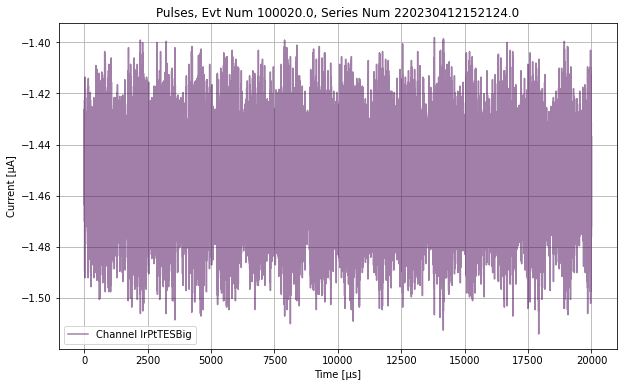

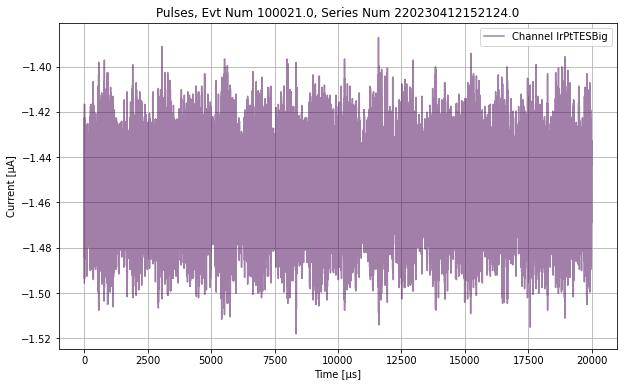

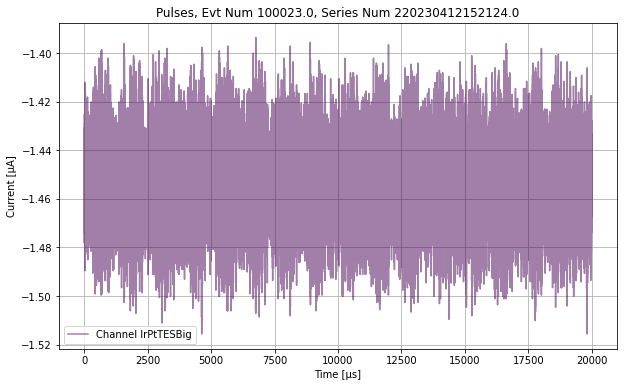

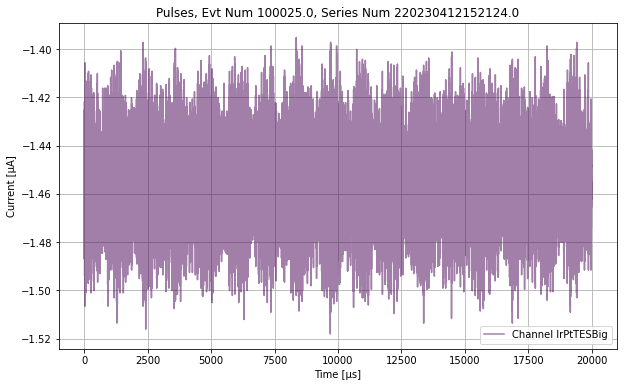

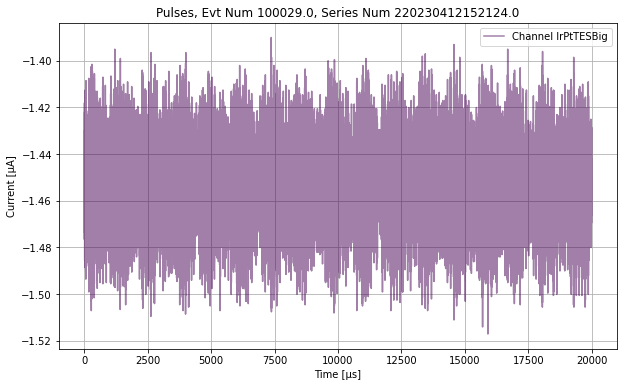

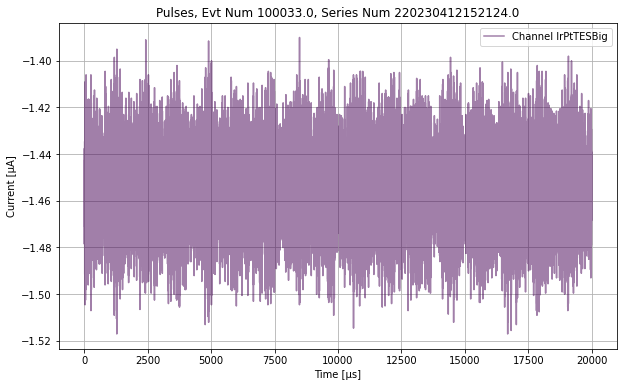

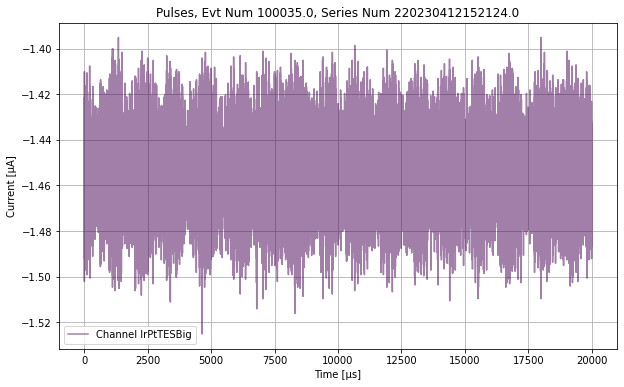

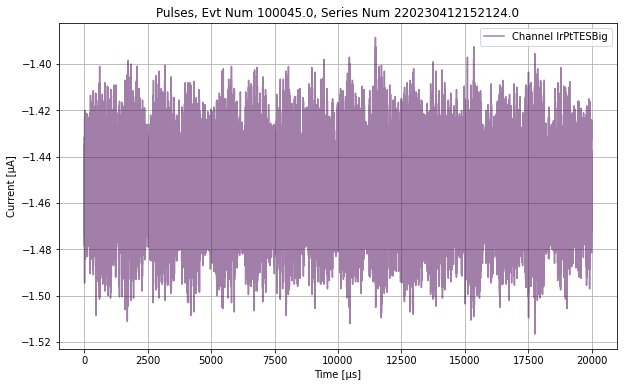

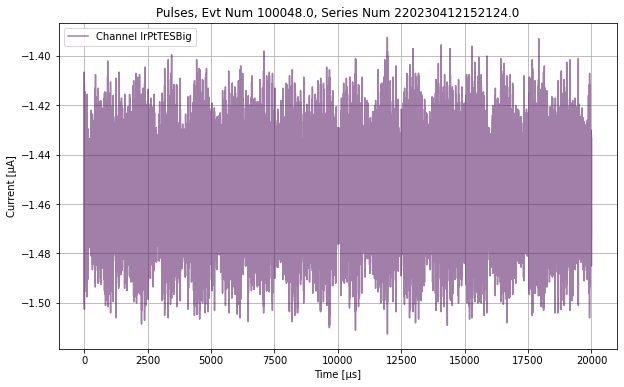

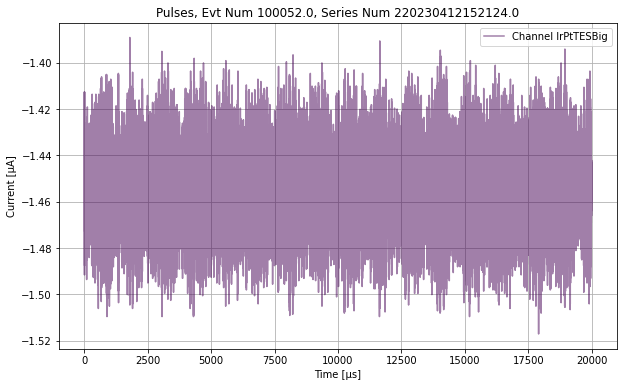

In [29]:
trigger_path = '/sdata1/runs/run20/raw/run20testproc3_I2_D20230412_T152124'

upper_rands = getrandevents(trigger_path,
    myanalyzer.get_values('event_number'),
    myanalyzer.get_values('series_number'),                       
    ntraces=999,
    nplot=10,
    channels=['IrPtTESBig'],
    lgcplot=True)

## This next snippet are just playing around with the ability to line up the waveforms to a set start time to try and get an "average" waveform for fitting. Not successful (yet)

In [30]:

t_up = upper_rands[0]
x_up = upper_rands[1]
cout_upper = upper_rands[2]
lowpassed_upper = qp.utils.lowpassfilter(x_up)

In [31]:
cout_upper

array([False, False, False, ...,  True,  True, False])

In [45]:
lowpassed_upper[1:10,0]

array([[-1.47431061e-06, -1.46517125e-06, -1.44705064e-06, ...,
        -1.44610727e-06, -1.44087888e-06, -1.43959137e-06],
       [-1.44843090e-06, -1.44393979e-06, -1.43959662e-06, ...,
        -1.44140757e-06, -1.44443828e-06, -1.44869717e-06],
       [-1.43018653e-06, -1.43653985e-06, -1.45317715e-06, ...,
        -1.44715530e-06, -1.44984013e-06, -1.45228341e-06],
       ...,
       [-1.46858411e-06, -1.46358076e-06, -1.45290467e-06, ...,
        -1.44359734e-06, -1.43329099e-06, -1.43088847e-06],
       [-1.41993301e-06, -1.42454324e-06, -1.44095994e-06, ...,
        -1.46940093e-06, -1.46211870e-06, -1.45572671e-06],
       [-1.45497881e-06, -1.45856486e-06, -1.46078228e-06, ...,
        -1.45415319e-06, -1.44832768e-06, -1.44613742e-06]])

Text(0.5, 1.0, 'upper low pass filtered pulses')

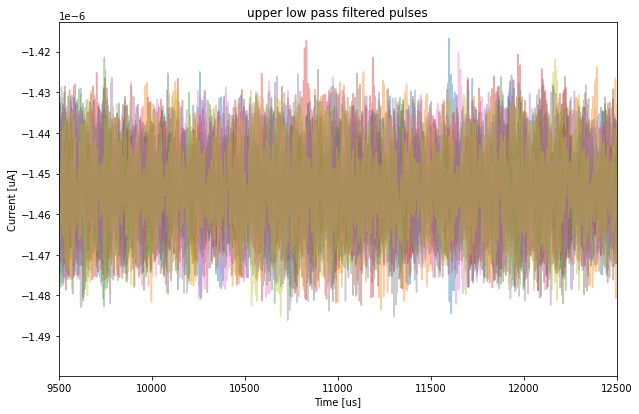

In [15]:
for xx in lowpassed_upper[1:10,0]:
    plt.plot(t_up*1e6, xx, alpha=0.4)
# plt.plot(t1*1e6, lowpassed_upper[5,0])
plt.xlim(9500, 12500)
plt.xlabel('Time [us]')
plt.ylabel('Current [uA]')
plt.title('upper low pass filtered pulses')

In [32]:
#myanalyzer.register_cut(cout_upper, 'cout_upper')
#myanalyzer.get_values('t0_of1x1_constrained_IrPtTESBig',cut=cout_upper)
t0_const = myanalyzer.get_values('t0_of1x1_constrained_IrPtTESBig')

In [34]:
t0_const[cout_upper]

array([ 2.824e-04,  1.408e-04, -4.104e-04, -7.840e-05, -3.992e-04,
       -3.120e-04,  1.520e-05, -3.760e-05,  6.000e-05, -3.520e-05,
       -6.560e-05, -4.720e-05, -4.000e-05, -4.504e-04, -4.280e-04,
       -1.760e-05,  2.480e-04, -1.888e-04,  5.760e-05, -2.040e-04,
        6.000e-05,  3.392e-04,  2.024e-04, -3.656e-04, -3.728e-04,
       -2.480e-05, -3.728e-04, -6.720e-05, -4.896e-04, -1.816e-04,
        1.424e-04,  8.800e-05,  3.648e-04, -1.920e-04,  3.144e-04,
        3.216e-04, -2.552e-04, -1.200e-04,  1.864e-04, -5.760e-05,
       -6.480e-05,  4.624e-04,  2.920e-04, -3.608e-04, -1.040e-04,
       -1.536e-04, -4.096e-04, -4.800e-05,  3.512e-04,  1.968e-04,
        4.592e-04,  4.592e-04,  4.152e-04, -3.568e-04, -3.096e-04,
       -2.752e-04, -3.000e-04,  1.504e-04, -4.400e-05,  2.280e-04,
       -3.792e-04, -4.040e-04, -7.680e-05,  6.560e-05, -2.568e-04,
        1.760e-05, -3.120e-05, -8.080e-05,  6.160e-05,  3.304e-04,
       -4.944e-04, -9.680e-05, -7.520e-05,  3.376e-04, -3.160e

In [36]:
#norm -> avg 
#.roll -> temp defn then /= np.max() 
fs = 1.25e6
x_temp_up = np.zeros(x_up.shape)
for ii in range(x_up.shape[0]):
    ts = np.roll(x_up[ii,0],-int(t0_const[cout_upper][ii]*fs))
    #print(int(df.oft0_constrained_CPDv21Ge[cout_upper].iloc[ii]*fs))
    ts-= np.mean(ts[0:6000])
    x_temp_up[ii] = ts/ts.max()
x_avg_up = np.mean(x_temp_up, axis = 0) 

In [37]:
ts

array([-3.35920643e-08, -4.55923390e-08, -1.90916371e-08, ...,
        2.84095455e-08,  2.99095798e-08,  8.90909915e-09])

In [38]:
x_avg_up

array([[ 0.01034707,  0.0068267 ,  0.00142078, ..., -0.00055714,
         0.00915895,  0.00491153]])

In [44]:
x_up

array([[[-1.44960461e-06, -1.44060431e-06, -1.43360415e-06, ...,
         -1.43660421e-06, -1.44810448e-06, -1.47210512e-06]],

       [[-1.49560575e-06, -1.47410517e-06, -1.43760424e-06, ...,
         -1.44560442e-06, -1.43260412e-06, -1.44360437e-06]],

       [[-1.46960506e-06, -1.43760424e-06, -1.43060408e-06, ...,
         -1.42760401e-06, -1.44010429e-06, -1.46710501e-06]],

       ...,

       [[-1.45160465e-06, -1.45260468e-06, -1.45310469e-06, ...,
         -1.47910528e-06, -1.47210512e-06, -1.44560442e-06]],

       [[-1.44860449e-06, -1.46360493e-06, -1.46610498e-06, ...,
         -1.42560396e-06, -1.42960405e-06, -1.45860481e-06]],

       [[-1.48710556e-06, -1.49910583e-06, -1.47260513e-06, ...,
         -1.42510395e-06, -1.42360392e-06, -1.44460440e-06]]])

In [41]:
lowpassed_avgupper = qp.utils.lowpassfilter(x_avg_up)

In [46]:
lowpassed_avgupper[1:10,0]

array([], dtype=float64)

Text(0.5, 1.0, 'upper low pass filtered pulses')

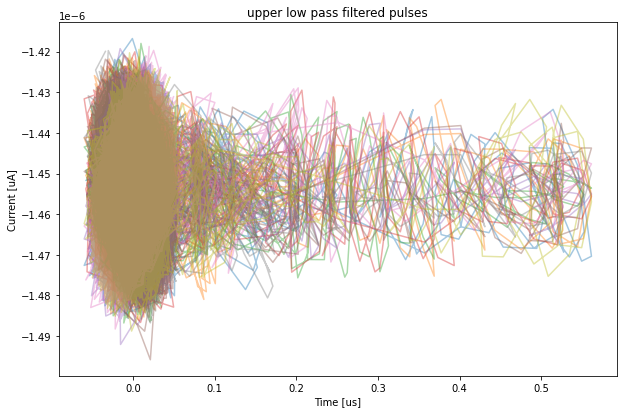

In [47]:
for xx in lowpassed_upper[1:10,0]:
    plt.plot(ts*1e6, xx, alpha=0.4)
# plt.plot(t1*1e6, lowpassed_upper[5,0])
#plt.xlim(9500, 12500)
plt.xlabel('Time [us]')
plt.ylabel('Current [uA]')
plt.title('upper low pass filtered pulses')

## Ok now lets do some simple plotting of random events and get interesting things out of them like PSD and hists